# RH - ANALYSE DE L'ATTRITION DES EMPLOYES

Membres Groupe : AZEDDINE Housna
                                  
                BAKKALI Amira 
                                  
                FAN Xinyi
                                  
                LU Xintong
                                  
                TCHEUGOUE Ryan
                                                                             




 # Introduction : 

Les bons employés sont un atout essentiel pour toute entreprise. Par ailleurs, de plus en plus d’entreprises se plaignent de la pénurie d’employés compétents sur le marché de l’emploi. Il vient donc naturellement que les entreprises cherchent à protéger leurs employés. Après des processus de recrutement généralement longs et compliqués à la recherche de la "perle rare", les chefs d'entreprises n'aimeraient pas voir leurs meilleurs employés les quitter car ils savent à quel point ça peut leur être préjudiciable. Face à ces constats, nous nous sommes intéréssés au dataset proposé par IBM relevant du domaine RH. Ce dataset porte sur l'attrition.

Dans le contexte des ressources humaines, l'attrition est une réduction de l'effectif causée par un départ à la retraite ou une démission sans projet de remplacer le poste laissé vacant. La question à laquelle nous avons cherché à répondre est la suivante : « Quels sont les employés susceptibles de partir ? »

Pour répondre à cette question nous avons eu recours à l'algorithme de classification naive bayésienne et à l'arbre de décisions. Nous avons également utilié une ACP (Analyse en Composante Principales) pour faire une réduction de dimensions.


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

import pandas as pd
with open("WA_Fn-UseC_-HR-Employee-Attrition.csv","r") as file:
    data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


   # Plan du notebook : 

### Exploration des données : 

Dans cette partie, nous allons explorer le jeu de données à notre disposition afin de visualiser les distributions et corrélations entre les différentes variables dont on dispose. 

### Implémentation des modèles Machines Learning : 

 Nous allons implémenter le modèle d'Arbre de décision avec critère GINI et entropie ensuite le modèle Naive Bayes sans et avec réduction des dimensions PCA.

### Conclusion : 

Dans cette dernière section, nous allons comparer les résultats obtenus suite à nos modèles, et en déduire des conclusions concernant la  précision, la vitesse et la pertinence en général de chaque modèle.

   # PARTIE 1 : EXPLORATION DES DONNEES

Avant d'entamer la visualisation des différentes relations liant les variables, une analyse et adaptation de notre jeux de données est effectuée, afin qu'il soit plus facile à étudier par la suite.


1) Remplacement des valeurs de la colonne "Attrition" par des valeurs numériques pour pouvoir l'exploiter : 
    1 = Yes & 0 = No

In [0]:
data.Attrition.replace(to_replace = dict(Yes = 1, No = 0 ), inplace = True)

2) Vérification de la présence de valeurs nulles dans le jeux de données

In [0]:
display(data.isnull().any())

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

3) Vérification du nombre de valeurs dans chaque colonne.

In [0]:
# Vérification de l'unicité des valeurs de chaque colonne
nbvalues = data.nunique()
nbvalues = nbvalues.sort_values()
nbvalues

Over18                         1
StandardHours                  1
EmployeeCount                  1
Gender                         2
Attrition                      2
PerformanceRating              2
OverTime                       2
MaritalStatus                  3
Department                     3
BusinessTravel                 3
StockOptionLevel               4
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
WorkLifeBalance                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate

Nous remarquons que les colonnes : 'StandardHours', 'EmployeeCount', 'Over18' et 'EmployeeNumber' ne donnent pas des informations pertinantes concernant l'attrition des employés, ainsi nous avons décidé de les enlever du jeux de données qu'on va utiliser. 

In [0]:
data = data.drop(columns=['StandardHours', 
                          'EmployeeCount', 
                          'Over18',
                          'EmployeeNumber'
                        ])

### Analyse :  

Il faut noter la présence de plusieurs variables dont les valeurs ne sont pas numériques, et qui ne pourront pas par la suite être exploitées pleinement, c'est pour cela qu'une transformation de ces valeurs a été effectuée. 

In [0]:
OverTime = {'Yes':1, 'No':0 }
data.OverTime=[OverTime[item] for item in data.OverTime]
MaritalStatus = {'Single':1, 'Married':2, 'Divorced':3 }
data.MaritalStatus=[MaritalStatus[item] for item in data.MaritalStatus]
JobRole = {'Sales Executive':1, 'Research Scientist':2, 'Laboratory Technician':3, 'Manufacturing Director':4, 'Healthcare Representative':5, 'Manager':6, 'Sales Representative':7, 'Research Director':8, 'Human Resources':9 }
data.JobRole=[JobRole[item] for item in data.JobRole]
Gender={'Male':1,'Female':0}
data.Gender=[Gender[item] for item in data.Gender]
EducationField = {'Life Sciences':1, 'Medical':2, 'Marketing':3, 'Technical Degree':4, 'Human Resources':5, 'Other':6 }
data.EducationField=[EducationField[item] for item in data.EducationField]
Department = {'Sales':1, 'Research & Development':2, 'Human Resources':3 }
data.Department=[Department[item] for item in data.Department]
BusinessTravel = {'Travel_Rarely':1, 'Travel_Frequently':2, 'Non-Travel':3 }
data.BusinessTravel=[BusinessTravel[item] for item in data.BusinessTravel]


In [0]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,1,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,2,279,2,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,1,1373,2,2,2,6,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,2,1392,2,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,1,591,2,2,1,2,1,1,...,3,4,1,6,3,3,2,2,2,2
5,32,0,2,1005,2,2,2,1,4,1,...,3,3,0,8,2,2,7,7,3,6
6,59,0,1,1324,2,3,3,2,3,0,...,4,1,3,12,3,2,1,0,0,0
7,30,0,1,1358,2,24,1,1,4,1,...,4,2,1,1,2,3,1,0,0,0
8,38,0,2,216,2,23,3,1,4,1,...,4,2,0,10,2,3,9,7,1,8
9,36,0,1,1299,2,27,3,2,3,1,...,3,2,2,17,3,2,7,7,7,7


In [0]:
data.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.392517,802.485714,1.739456,9.192517,2.912925,2.153741,2.721769,0.600000,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.383865,1.093082,0.490065,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,1.000000,102.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,1.000000,802.000000,2.000000,7.000000,3.000000,2.000000,3.000000,1.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,4.000000,1.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,3.000000,1499.000000,3.000000,29.000000,5.000000,6.000000,4.000000,1.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Le jeux de données est bien nettoyé, il n'y a pas de valeurs nulles et les colonnes inutiles ont été supprimées. 

Nous avons en total 1470 données, chacune ayant 30 variables décrivant la situation de l'employé et une colonne Attrition indiquant la décision de ce dernier.

Il y a une moyenne d'âge de 36 ans au sein des employés dont la plupart ont une moyenne de 43 ans. En général, la plupart des employés habitent à une distance de 14 miles, et la plupart des employés sont satisfaits de leur environnement, ont travaillé en moyenne 15 ans, et sont restés dans le même poste et avec le même manager pendant 7 ans.

### Poucentage d'attrition :  

In [0]:
attrition = data[(data['Attrition'] != 0)]
no_attrition = data[(data['Attrition'] == 0)]


In [0]:
trace = go.Pie(labels = ['Non', 'Oui'], values = data['Attrition'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['blue','yellow'], 
                           line=dict(color='#000000', width=1.5)))

layout = dict(title =  'Pourcentage de l`attribution')

graphe1 = dict(data = [trace], layout=layout)

In [0]:
py.iplot(graphe1);

#### Observation : 

Parmi les 1470 employés, 237 ont résigné ce qui est équivalent à 16.1%. Ceci représente une situation anormale qui devrait pousser les managers à se poser des questions. Ainsi, une analyse plus approfondie des données est réalisées.

### Corrélation :  

In [0]:
data.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,-0.024751,0.010661,0.031882,-0.001686,0.208034,-0.035850,0.010146,-0.036311,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.000074,-0.056652,-0.063991,0.077924,-0.031373,0.051567,-0.103369,0.029453,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,-0.024751,-0.000074,1.000000,0.004086,-0.009044,0.024469,-0.000757,-0.025657,-0.004174,0.032981,...,0.026341,0.035986,0.016727,-0.034226,-0.015240,0.011256,0.014575,0.011497,0.032591,0.022636
DailyRate,0.010661,-0.056652,0.004086,1.000000,-0.007109,-0.004985,-0.016806,-0.018291,0.018355,-0.011716,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,0.031882,-0.063991,-0.009044,-0.007109,1.000000,-0.017225,-0.007996,0.006415,0.019395,0.041583,...,0.024604,0.022414,0.012193,0.015762,-0.036875,-0.026383,-0.022920,-0.056315,-0.040061,-0.034282
DistanceFromHome,-0.001686,0.077924,0.024469,-0.004985,-0.017225,1.000000,0.021042,0.005369,-0.016075,-0.001851,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.000757,-0.016806,-0.007996,0.021042,1.000000,0.033467,-0.027128,-0.016547,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.035850,0.051567,-0.025657,-0.018291,0.006415,0.005369,0.033467,1.000000,0.061149,0.017465,...,-0.014649,-0.000440,-0.020446,-0.027703,-0.005588,0.047322,-0.022710,-0.015588,-0.029528,-0.010316
EnvironmentSatisfaction,0.010146,-0.103369,-0.004174,0.018355,0.019395,-0.016075,-0.027128,0.061149,1.000000,0.000508,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,0.032981,-0.011716,0.041583,-0.001851,-0.016547,0.017465,0.000508,1.000000,...,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599


In [0]:
numerical = data.columns

In [0]:
datas = [
    go.Heatmap(
        z= data[numerical].astype(float).corr().values, # Generating the Pearson correlation
        x=data[numerical].columns.values,
        y=data[numerical].columns.values,
        colorscale='Viridis',
        reversescale = False,
#         text = True ,
        opacity = 1.0
        
    )
]


layout = go.Layout(
    title='Correlation',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 800,
    
)


fig = go.Figure(datas, layout)
py.iplot(fig, filename='labelled-heatmap')

#### Observation :  

La plupart des variables sont faiblement corrélées entre elles, sauf les colonnes "YearsWithCurrManager", "YearsAtCompany", "YearsInCurrentRole"et "YearsSinceLastPromotion" qui ont des coefficients supérieurs à 0.6.

Nous remarquons que le "JobLevel" et "MonthlyIncome" sont exceptionnellement fortement corrélées avec un coefficient de 0.9.

Nous remarquons aussi qu'aucune autre variable n'influence énormément l'attrition.

In [0]:
def plot_bar(var_select) :
    p1 = data[(data['Attrition'] != 0)]
    p2 = data[(data['Attrition'] == 0)]


    color=['lime', 'mediumslateblue' ]
    trace1 = go.Bar(
        x=p1[var_select].value_counts().keys().tolist(),
        y=p1[var_select].value_counts().values.tolist(),
        name='Attrition',opacity = 0.8, marker=dict(
        color='lime',
        line=dict(color='#000000',width=1)))
    
    trace2 = go.Bar(
        x=p2[var_select].value_counts().keys().tolist(),
        y=p2[var_select].value_counts().values.tolist(),
        name='Non_Attrition', opacity = 0.8, marker=dict(
        color='mediumslateblue',
        line=dict(color='#000000',width=1)))

    layout = dict(title =  str(var_select),
              xaxis=dict(), 
              yaxis=dict(title= 'Count'))

    graphe = go.Figure(data=[trace1, trace2], layout=layout)
    py.iplot(graphe)

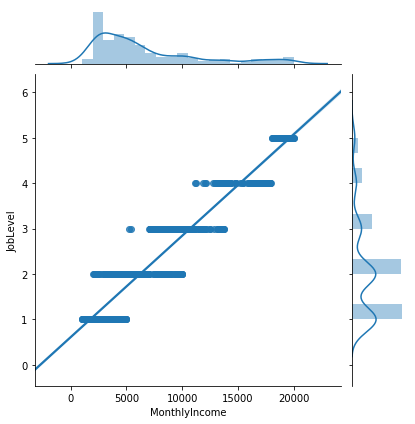

In [0]:
sns.jointplot(data.MonthlyIncome,data.JobLevel, kind = "reg")   
plt.show()

### Commentaire :  

Effectivement, on voit bien qu'une augmentation du niveau du poste de l'employé entraine une augmentation du salaire. Ce qui est complètement logique et prédictible.

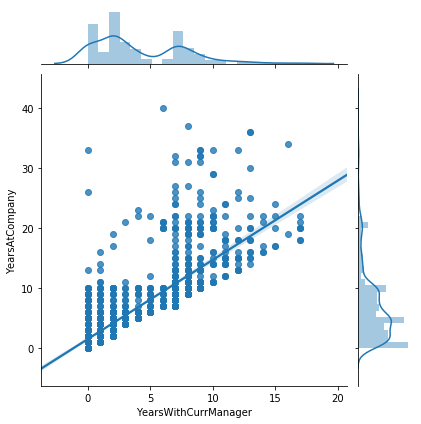

In [0]:
sns.jointplot(data.YearsWithCurrManager,data.YearsAtCompany, kind = "reg")   
plt.show()

In [0]:
plot_bar('YearsWithCurrManager')

In [0]:
plot_bar('YearsInCurrentRole')

### Commentaire :  

On remarque que globalement, il y a une similitude assez remarquable entre le comportement des années passées en entreprise et des années passées avec un manager. Puisqu'on remarque que les points ne sont pas énormément dispersés de la ligne de régression. Ensuite, on peut voir des barplots, que le nombre d'années passées avec un manager et le nombre d'années passées dans la même position influent presque de la même manière l'attrition.

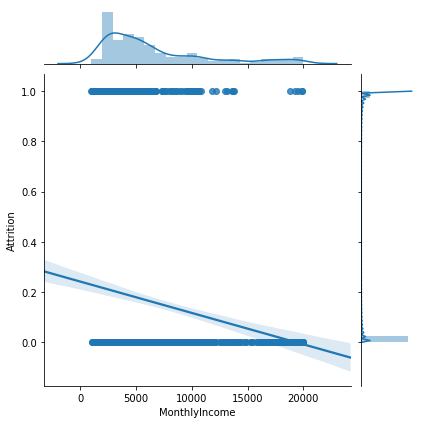

In [0]:
sns.jointplot(data.MonthlyIncome,data.Attrition, kind = "reg")   
plt.show()

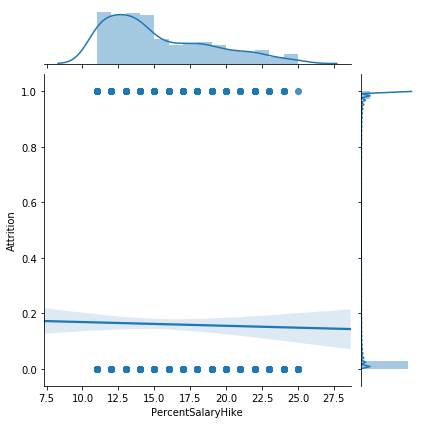

In [0]:
sns.jointplot(data.PercentSalaryHike,data.Attrition, kind = "reg")   
plt.show()

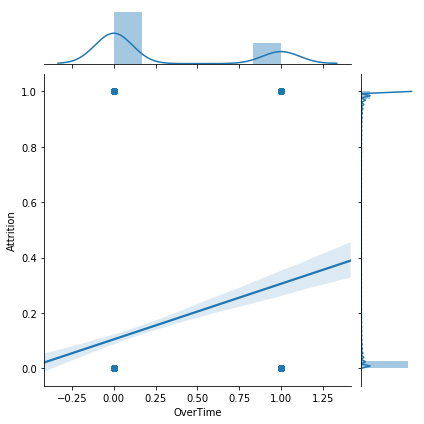

In [0]:
sns.jointplot(data.OverTime,data.Attrition, kind = "reg")   
plt.show()

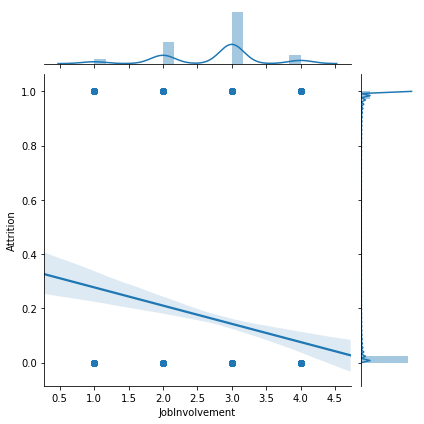

In [0]:
sns.jointplot(data.JobInvolvement,data.Attrition, kind = "reg")   
plt.show()

### Observation : 

Nous remarquons que :

    L'attrition augmente après 1, 2 ou 7 ans passées dans le même poste, ou avec le même manager.
    
    Le salaire influe effectivement l'attrition,plus il est faible plus il y a des chances que l'employé quitte son travail.
    
    Plus l'employé est impliqué dans son travail et moins il a des heures supplémentaires à travailler, moins il a de chances de laisser son travail. Donc les colonnes "JobInvolvement" et "OverTime" influent elles aussi l'attrition.

   # PARTIE 2 : Implémentation des modèles Machines Learning

L'objectif de ce notebook, étant comme cité avant, pouvoir prédir si un employé va quitter son travail ou pas, c'est-à-dire qu'on a deux catégories d'employés en fin de compte, avec ou sans attrition. Ainsi puisque notre variable est qualitative, cela revient à un problème de classement, donc nous avons opté pour un apprentissage supervisé.

Nous avons choisi pour cela d'étudier deux modèles différents avec des critères différents: 

1) Arbre de décision avec critère GINI

2) Arbre de décision avec citère entropie

3) Naïve Bayes sans PCA

4) Naïve Bayes avec PCA

Avant d'appliquer les modèles d'algorithmes, nous avons divisé notre Data en partie d'entrainement qui compte pour 70% de notre jeu de données et une partie de test de 30%.

In [0]:
import sklearn
from sklearn.model_selection import train_test_split
data['Ages'] = data['Age']
data = data.drop(columns = ['Age'])
X = data.values[:, 1:31]
Y = data.values[:,0]
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

##  Arbre de décision avec critère GINI

Nous avons choisi de commencer notre étude par l'arbre de décision, car ce dernier représente plusieurs avanyages. Notamment sa facilité à être visualisé et compris et sa capacité de traiter des problèmes multi-class.

Etablissement du modèle d'arbre de décision.



In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import time
model = DecisionTreeClassifier(criterion = "gini",
                                min_samples_leaf=31)

Le critère GINI est un indice de diversité utilisé par l'algorithme CART, il mesure avec quelle fréquence un élément aléatoire de l'ensemble serait mal classé si son étiquette était choisie aléatoirement selon la distribution des étiquettes dans le sous-ensemble. L'indice de diversité de Gini peut être calculé en sommant la probabilité pour chaque élément d'être choisi, multipliée par la probabilité qu'il soit mal classé.


Afin d'éviter le sur-apprentissage de notre modèle si notre arbre s'avère trop complexe, nous avons renseigné le "min_samples_leaf" qui n'est autre que le nombre d'exemples minimal dans une feuilles, plus ce nombre est proche du nombre de variables qu'on a, plus la précision de notre modèle est supérieure. 

Dans l'objectif d'éviter le sur-apprentissage aussi, il faut renseingner une bonne profondeur maximale de l'arbre "max_depth", sinon on aura une perte de précision. C'est pour cela nous avons décidé de laisser la valeur par défaut de ce critère, car celle ci répartit les noeuds jusqu'à ce que les valeurs des feuilles soient pures.

fitting : construction du modèle 

In [0]:
t_start3 = time.clock()
model.fit(X_train, y_train)
t_end3 = time.clock()
time_diff3 = t_end3 - t_start3

In [0]:
with open("model.txt", "w") as f:
    f = tree.export_graphviz(model, out_file=f)

Prédiction de nouveaux échantillons

In [0]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Graphe de l'arbre de décision :

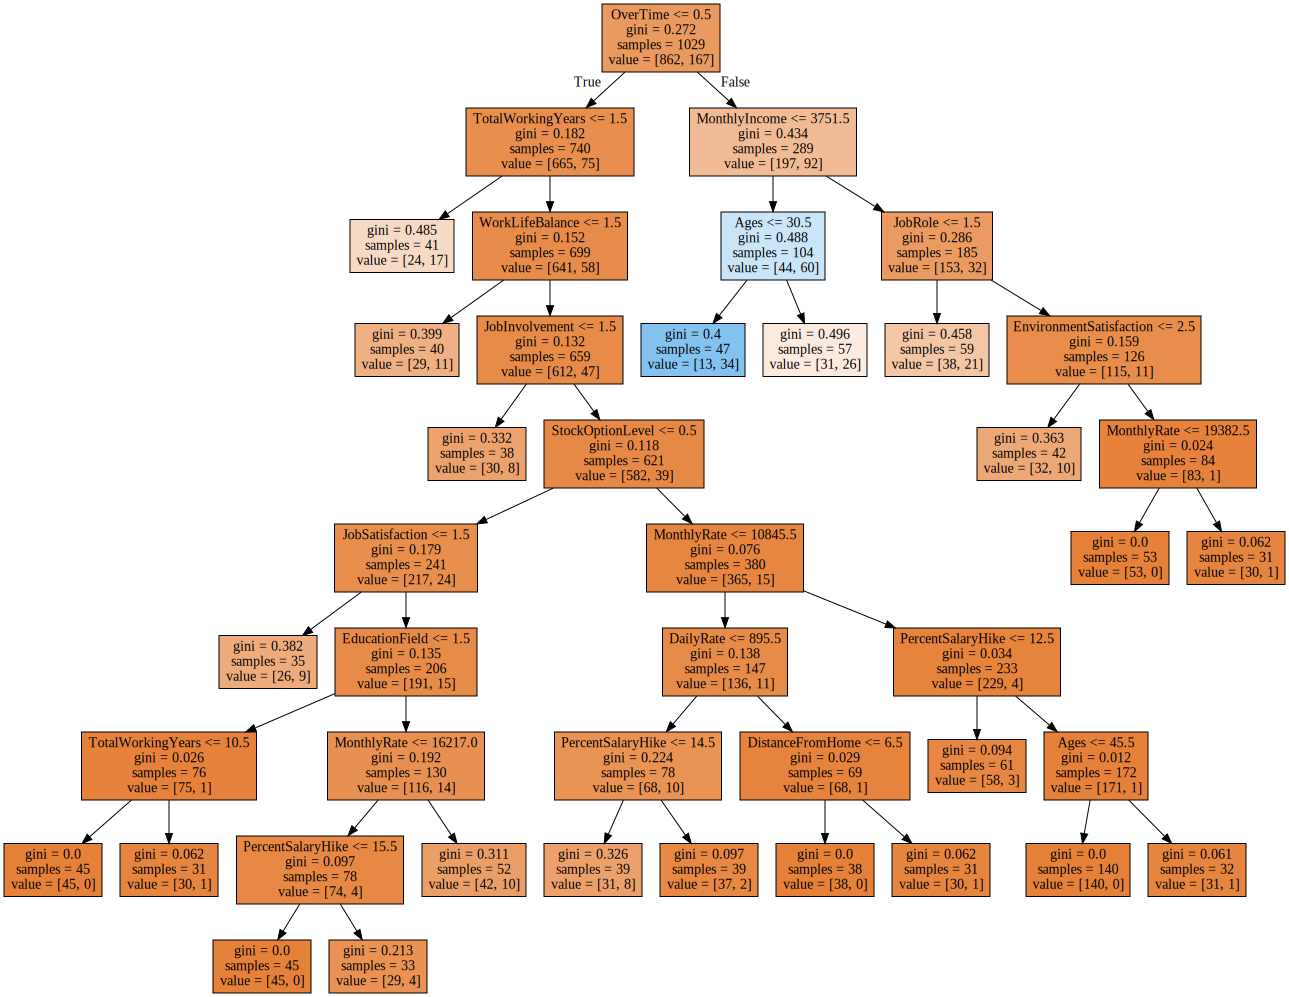

In [0]:
import graphviz
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
data2 = data.drop(columns=['Attrition'])
labels = data2.columns
graph = Source(tree.export_graphviz(model, out_file=None
   , feature_names=labels  
   , filled = True))
display(SVG(graph.pipe(format='svg')))

### Observations : 

In [0]:
print ( accuracy_score(y_test,y_pred)*100)

85.4875283446712


In [0]:
print(str(time_diff3))

0.770181208332


In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       371
           1       0.67      0.17      0.27        70

   micro avg       0.85      0.85      0.85       441
   macro avg       0.76      0.58      0.60       441
weighted avg       0.83      0.85      0.82       441



Matrice de confusion 

Confusion matrix, without normalization
[[365   6]
 [ 58  12]]


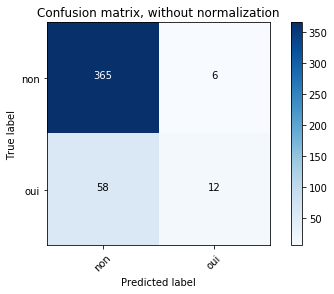

In [0]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
confusion_matrix=confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
class_names=["non","oui"]
plt.figure()
plot_confusion_matrix(confusion_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')


plt.show()


##  Arbre de décision avec critère entropie

Dans le but de comparer les critères de l'arbre de décision, leur logique et leur précision. Nous avons repris le même travail qu'auparavant avec l'entropie comme critère.

L'entropie de Shannon, correspond en fait, à la quantité d'information contenue ou délivrée par une source d'information. Plus la source émet d'informations différentes, plus l'entropie (ou incertitude sur ce que la source émet) est grande. 

In [0]:
model3 = DecisionTreeClassifier(criterion = "entropy", min_samples_leaf=31)

In [0]:
t_start2 = time.clock()
model3.fit(X_train, y_train)
t_end2 = time.clock()
time_diff2 = t_end2 - t_start2

In [0]:
with open("model.txt", "w") as f:
    f = tree.export_graphviz(model3, out_file=f)

In [0]:
y_pred3 = model3.predict(X_test)
y_pred3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

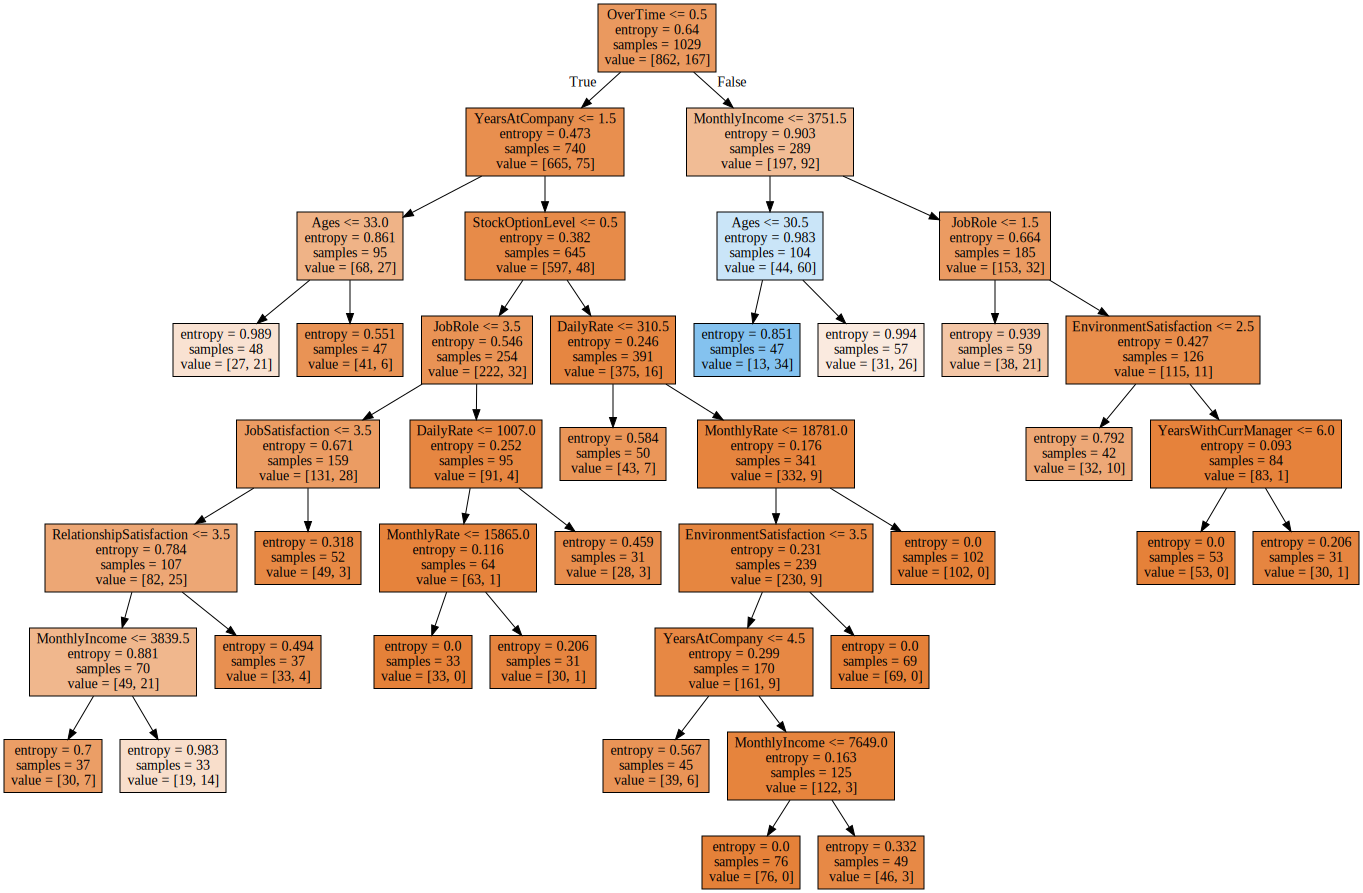

In [0]:
graph = Source(tree.export_graphviz(model3, out_file=None
   , feature_names=labels  
   , filled = True))
display(SVG(graph.pipe(format='svg')))

### Observations : 

In [0]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       371
           1       0.67      0.17      0.27        70

   micro avg       0.85      0.85      0.85       441
   macro avg       0.76      0.58      0.60       441
weighted avg       0.83      0.85      0.82       441



In [0]:
print ( accuracy_score(y_test,y_pred3)*100)

85.4875283446712


In [0]:
print(str(time_diff2))

0.0307109239839


Confusion matrix, without normalization
[[365   6]
 [ 58  12]]


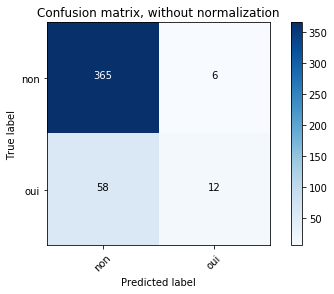

In [0]:
!!m!import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# Compute confusion matrix
confusion_matrix=confusion_matrix(y_test,y_pred3)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
class_names=["non","oui"]
plt.figure()
plot_confusion_matrix(confusion_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')


plt.show()


##  Naïve Bayes sans PCA

Après une étude exploratoire des données, on a constaté que les différentes variables qui constituent notre dataset sont assez indépendantes (coefficients de corrélation faibles; inférieurs à 0.10 en moyenne). Pour cette raison, nous avons choisi d'utiliser l'algorithme Naïve Bayes car il est efficace lorsqu'il est appliquée à des données non correlées entre elles.


In [0]:
from sklearn import metrics
import sklearn.naive_bayes as sk_bayes
# Il y a 3 models naive Bayes :Multinominal, Bernoulli, Gaussian
# Apres les tests, on a trouve qu'on peut avoir une precision le plus importante en utilisant Gaussian Naive Bayes

#sansPCAmodel = sk_bayes.MultinomialNB(alpha=1.0,fit_prior=True,class_prior=None) # multinominal naive Bayes
#sansPCAmodel = sk_bayes.BernoulliNB(alpha=1.0, binarize=0.0, fit_prior=True, class_prior=None)  # Bernoulli naive Bayes
sansPCAmodel = sk_bayes.GaussianNB()# Gaussian naive Bayes
t_start1 = time.clock()
sansPCAmodel.fit(X_train, y_train)
t_end1 = time.clock()
time_diff1 = t_end1 - t_start1
expected = y_test
predicted = sansPCAmodel.predict(X_test)

### Observations : 

In [0]:
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.90      0.78      0.84       371
           1       0.33      0.56      0.41        70

   micro avg       0.75      0.75      0.75       441
   macro avg       0.61      0.67      0.62       441
weighted avg       0.81      0.75      0.77       441



In [0]:
print(accuracy_score(y_test, predicted) * 100)

74.60317460317461


In [0]:
print(str(time_diff1))

0.00168277476769


Confusion matrix, without normalization
[[290  81]
 [ 31  39]]


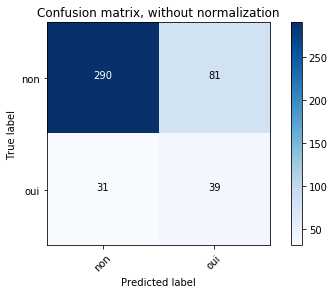

In [0]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# Compute confusion matrix
confusion_matrix=confusion_matrix(expected, predicted)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
class_names=["non","oui"]
plt.figure()
plot_confusion_matrix(confusion_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')


plt.show()


Nous avons remarqué que la précision de notre modèle n'est pas très grande (<80%), donc nous avons décidé d'augmenter la précision du modèle en utilisant un Gradient Booster.

In [0]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier #For Classification
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,predicted))  
print(classification_report(y_test,predicted)) 
clf = GradientBoostingClassifier(n_estimators=88, learning_rate=1.0, max_depth=1)


[[290  81]
 [ 31  39]]
              precision    recall  f1-score   support

           0       0.90      0.78      0.84       371
           1       0.33      0.56      0.41        70

   micro avg       0.75      0.75      0.75       441
   macro avg       0.61      0.67      0.62       441
weighted avg       0.81      0.75      0.77       441



In [0]:
clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=88,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

### Observations :  

In [0]:
predicted2 = clf.predict(X_test)
print(confusion_matrix(y_test,predicted2))  
print(classification_report(y_test,predicted2))

[[353  18]
 [ 35  35]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       371
           1       0.66      0.50      0.57        70

   micro avg       0.88      0.88      0.88       441
   macro avg       0.79      0.73      0.75       441
weighted avg       0.87      0.88      0.87       441



In [0]:
print(accuracy_score(y_test, predicted2) * 100)

87.98185941043084


##  Naïve Bayes avec PCA

Nous avons opté à une réduction de dimensions, car en étudiant notre modèle d'arbre de décision, nous avons conclu que notre jeu de données se compose de plusieurs variables, qui ne sont pas toutes fortement influentes sur la catégorisation des employés.
Nous avons utilisé PCA (principal component analysis) afin de réduire les dimensions, car ce modèle diminue le nombre de variables utilisées tout en gardant un maximum d'informations disponibles. Ainsi pratique et simple nous l'avons appliqué à notre deuxième modèle.

In [0]:
from sklearn.decomposition import PCA
# appliquer PCA pour reduire les dimensions
# n_components: nombre de dimension obtenu
pca = PCA(n_components=29)
pca_X_train = pca.fit_transform(X_train)
pca_X_test = pca.transform(X_test)


In [0]:
# Avec PCA
PCAmodel = sk_bayes.GaussianNB()
t_start = time.clock()
PCAmodel.fit(pca_X_train, y_train)
t_end = time.clock()
time_diff = t_end - t_start
expected3 = y_test
predicted3 = PCAmodel.predict(pca_X_test)

### Observations : 

In [0]:
print(metrics.classification_report(expected3, predicted3))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       371
           1       0.56      0.36      0.43        70

   micro avg       0.85      0.85      0.85       441
   macro avg       0.72      0.65      0.68       441
weighted avg       0.83      0.85      0.84       441



In [0]:
print(accuracy_score(y_test, predicted3) * 100)

85.26077097505669


In [0]:
print(str(time_diff))

0.104552195884


Confusion matrix, without normalization
[[351  20]
 [ 45  25]]


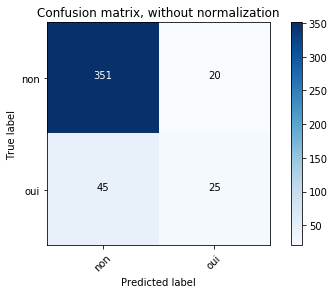

In [0]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# Compute confusion matrix
confusion_matrix=confusion_matrix(expected3, predicted3)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
class_names=["non","oui"]
plt.figure()
plot_confusion_matrix(confusion_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')


plt.show()


   # PARTIE 3 : Comparaison et Conclusion 


critères |arbre de décision avec critère GINI | arbre de décision avec entropie| Naïve Bayes sans PCA|Naïve Bayes avec PCA
---|---|---|---|---
précision score(%) |85.48|85.48|74.60|85.26
temps d'apprentissage(s) | 0.77|0.03 |0.001 | 0.104






**Arbre de décision avec critère GINI vs Arbre de décision avec critère entropie**

Les critères GINI et entropie ayant des logiques différentes, ont chacun entrainé un graphe d'arbre de décision différent. Cependant en fin de compte on a retrouvé la même précision, le même rapport de classification et la même matrice de confusion.


En effet, l'arbre de décision donne une bonne précision, cependant la matrice de confusion a montré que l'algorithme a réussi à bien prédir dans la plupart des cas si un employé va rester (Attrition = non), mais il a eu du mal à prédir si l'employer va quitter son travail (Attrition = oui), ce qui représente un point faible.


En contre partie, on retrouve une différence nette dans la vitesse d'apprentissage des deux modèles d'arbre de décision. On remarque alors que le critère d'entropie nous donne une bonne précision et nous fais gagner énormément en temps ce qui en fait un avantage.

**Naïve Bayes sans PCA vs Naïve Bayes avec PCA**

Pour comparer les deux méthodes pour le Naïve Bayes, on a utilisé le même modèle de Naïve Bayes (Guassian Naïve Bayes).


En observant les deux rapports et les matrices de confusion, la précision, le recall, f1-score et support de l'attrition et le non-attrition ont tous augmenté avec PCA.


Par concéquent, on a trouvé que le Naïve Bayes sans réduction des dimensions est beaucoup plus rapide qu'avec, ce qui est tout à fait prédictible. Cependant, malgré le fait que la PCA nous a fait perdre en terme de temps d'apprentissage, elle nous a fait gagner remarquablement en précision.

**Conclusion générale**

Pour conclure, si on compare les plus et les moins de nos algorithmes, on pourrait dire que l'arbre de décision avec entropie est une bonne solution pour étudier si un employé va quitter son entreprise avec le jeu de données dont on dispose.
